# Ch06 Pandas DataFrame 統計檢定

## Bi-variate Analysis (多變量分析)

Descriptive statistics between two or more variables

In statistics, when analyzing relationships between different types of variables—categorical (qualitative) and continuous (quantitative)—there are various methods used. Here's a brief overview:

1. Categorical vs. Continuous:
- Box Plots: A box plot for each category can show the distribution of a continuous variable.
- ANOVA (Analysis of Variance): Tests if there are statistically significant differences between the means of three or more independent (unrelated) groups.
- T-Test: If you only have two groups, a T-test can be used to determine if there is a significant difference between the means.
- Covariance and Correlation: Measures the direction and strength of the relationship between two continuous variables.
- Regression Analysis: Used to predict the value of a dependent (target) variable based on the value of an independent (predictor) variable.

2. Categorical vs. Categorical:
- Contingency Table (Cross-tabulation): Shows the frequency distribution of the variables.
- Chi-Squared Test: Tests the independence of two categorical variables.
- Fisher's Exact Test: Used for small sample sizes to determine if there are nonrandom associations between two categorical variables.

3. Continuous vs. Continuous:
- Scatter Plot: To visualize the relationship between two continuous variables.
- Pearson Correlation: To measure the linear correlation between two continuous variables.
- Spearman's Rank Correlation: To measure the strength and direction of association between two ranked variables.
- Regression Analysis: Can be simple linear regression for one predictor variable or multiple regression for more than one predictor.


---
# Categorical vs. Categorical
[參考資料](https://thecompletemedic.com/research/relative-risk-and-odds-ratio)<br>
當我們在統計檢定中面對兩個分類變數（Categorical vs. Categorical）的情境時，<br>
常用的方法
- 列聯表（Contingency Table, 又稱為交叉分析表）
- 卡方檢定（Chi-Squared Test）
- 費雪精確檢定（Fisher's Exact Test）。
  
來檢測兩個分類變數之間是否獨立。

---
### 列聯表（Contingency Table） 
提供了一個視覺化的方式來查看分類變數之間的頻率分佈。

Case Explanation: 假設我們有一個關於員工的數據集，包含他們的部門（department）和是否晉升（promotion）。

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

# Generating the dataset for example
data = {'department': ['IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance'],
        'promotion': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']}
df = pd.DataFrame(data)

# Creating a contingency table
contingency_table = pd.crosstab(df['department'], df['promotion'])
print(df)


print("---------Contingency Table:---------")
print(contingency_table)



   department promotion
0          IT       Yes
1          HR        No
2     Finance       Yes
3          IT        No
4          HR        No
5     Finance       Yes
6          IT       Yes
7          HR        No
8     Finance       Yes
9          IT        No
10         HR       Yes
11    Finance        No
---------Contingency Table:---------
promotion   No  Yes
department         
Finance      1    3
HR           3    1
IT           2    2


### 卡方檢定（Chi-Squared Test） 

用於檢測兩個分類變數之間是否獨立。其P值可以幫助我們判斷變數之間是否有顯著的關聯。

In [24]:
# Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(df)

print("---------Chi-Squared Test:---------")
print("Chi2 Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


   department promotion
0          IT       Yes
1          HR        No
2     Finance       Yes
3          IT        No
4          HR        No
5     Finance       Yes
6          IT       Yes
7          HR        No
8     Finance       Yes
9          IT        No
10         HR       Yes
11    Finance        No
---------Chi-Squared Test:---------
Chi2 Statistic: 2.0
P-value: 0.36787944117144245
Degrees of Freedom: 2
Expected Frequencies:
 [[2. 2.]
 [2. 2.]
 [2. 2.]]


- `卡方統計量（Chi2 Statistic）`：<br>
  這個值是2.0。卡方統計量是衡量觀察頻率和期望頻率之間差異的一種指標。值越大，表示觀察值和期望值之間的差異越大。

- `P值（P-value）`：<br>
  結果是0.36787944117144245。P值用於判斷觀察到的數據在零假設（兩個變數是獨立的，即沒有關聯）下出現的概率。通常，如果P值小於0.05（5%的顯著性水平），我們會拒絕零假設，認為兩個變數之間存在統計學上的顯著關聯。在這個案例中，P值大於0.05，因此我們沒有足夠的證據拒絕零假設，即部門和晉升之間沒有顯著的關聯。

- `自由度（Degrees of Freedom, dof）`：<br>
  自由度是2。自由度是在計算期望頻率時受到限制的參數數量。在卡方檢定中，自由度通常計算為(行數 - 1) * (列數 - 1)。在這個例子中，我們有3個部門和2種晉升狀態（Yes/No），因此自由度為(3-1)*(2-1)=2。

- `期望頻率（Expected Frequencies）`：<br>
  期望頻率矩陣顯示在每個類別中期望的觀察數量，假設兩個變數是獨立的。在這個例子中，每個部門對於晉升（Yes或No）的期望頻率都是2。這意味著如果部門和晉升狀態之間沒有關聯，我們期望每個部門中晉升和未晉升的員工數量平均分佈。

---

### 費雪精確檢定（Fisher's Exact Test） - case control studies

通常用於樣本量較小的情況，用來判斷兩個分類變數之間是否存在非隨機的關聯。

### Relative Risk (Risk Ratio)
相對風險是關聯性的衡量標準。它是兩個機率的比率，兩者的結果相同，但條件不同。它涉及在給定與暴露（可疑風險或保護因素）相關的結果發生率的情況下檢查該結果（例如疾病）的機率。<br>
本質上，`相對風險是暴露組和未暴露組之間疾病發生率的比率`。該比率告訴您，與未接觸風險/保護因素的人相比，接觸風險/保護因素的人患病的可能性有多大。

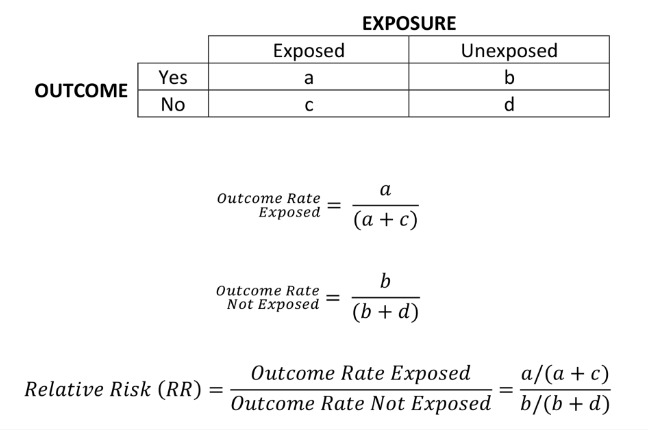


##### Interpretation 解釋 <br>
If the relative risk is 1, then the risk of disease is similar in both exposed and unexposed groups and the exposure is not associated with the disease.
如果相對風險為 1，則暴露組和未暴露組的疾病風險相似，且暴露與疾病無關。

If the relative risk is greater than 1, then the exposure is considered to be positively associated with having the disease and could be a risk factor.
如果相對風險大於 1，則認為暴露與患病呈正相關，並且可能是一個風險因素。

If the relative risk is less than 1, then the exposure is considered to be negatively associated with having the disease and could be a protective factor.
如果相對風險小於 1，則暴露被認為與患病呈負相關，並且可能是保護因子。


### Odds Ratio
優勢比是特定暴露（可疑風險或保護因子）與特定結果（例如疾病）之間關聯的測量。它是兩個賠率的比率，它告訴您暴露的存在或不存在如何對結果的存在或不存在產生影響。然後可以使用比值比來比較該結果的各種風險因素。<br>

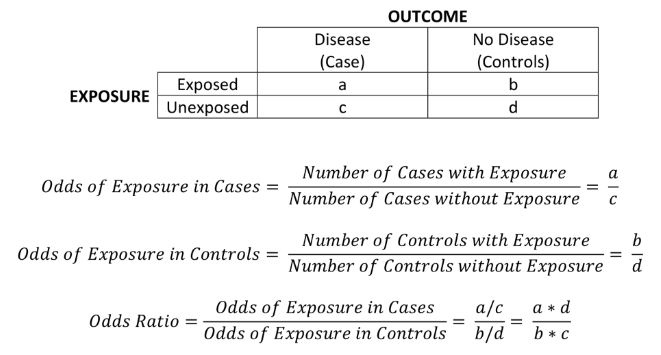

##### Interpretation 解釋 <br>
If the odds ratio is 1, then the odds of exposure among cases is the same as the odds of exposure among controls. This means the exposure is not associated with the disease.
如果優勢比為 1，則病例之間的暴露幾率與對照組之間的暴露幾率相同。這意味著接觸與疾病無關。

If the odds ratio is greater than 1, then the odds of exposure among cases is greater than the odds of exposure among controls. Therefore, the exposure may be a risk factor for the disease.
如果優勢比大於 1，則病例之間的暴露幾率大於對照組之間的暴露幾率。因此，接觸可能是該疾病的危險因子。

If the odds ratio is less than 1, then the odds of exposure among cases is lower than the odds of exposure among controls. Therefore, the exposure may be a protective factor against the disease.
如果優勢比小於 1，則病例之間的暴露幾率低於對照組之間的暴露幾率。因此，暴露可能是預防該疾病的保護因子。

##### 名詞解釋
在病例對照研究（Case-Control Studies）中，"cases"通常指的是患有特定狀況或疾病的組別，而"controls"則是沒有那種狀況或疾病的組別。"Exposure"則指的是被研究對象是否接觸過可能與疾病相關的因素。

- 病例（Cases）：這一組是研究中那些已經發展出研究關注的疾病或狀況的個體。在病例對照研究中，這些個體被選中是因為他們代表了疾病的發生（即已經暴露於某種風險因素並且疾病發展了出來）。

- 對照組（Controls）：對照組是那些沒有發展出研究關注疾病或狀況的個體。他們被選中是為了提供一個參考基線，使研究者能夠比較病例組和未發病的一般群體間的差異。

關於暴露（Exposure）和未暴露（Non-Exposure）：

- 暴露（Exposure）：在病例對照研究中，暴露指的是與研究關注的疾病或狀況相關的任何風險因素或條件。例如，如果研究的目的是評估吸煙與肺癌的關聯，那麼吸煙就被認為是一種暴露。

- 未暴露（Non-Exposure）：未暴露指的是那些沒有接觸到特定風險因素或條件的個體。在上面的例子中，非吸煙者將被視為未暴露。
---
### 類比

在這個例子中，為了演示，從列聯表中選取了'IT'和'HR'兩個部門進行檢定，因為費雪檢定適用於2x2的情況。

先計算列聯表
| Department | Promotion(YES) | Promotion(NO) |
|------------|----------------|---------------|
| IT         | 2              | 2             |
| HR         | 1              | 3             |


在表格中，我們有“晉升(YES)”和“晉升(NO)”兩個類別，這些並不直接對應到病例對照研究中的“病例(cases)”和“對照(controls)”。然而，如果我們要將這個框架應用到您的數據上，我們可能會把晉升的員工當作是“病例”，因為他們有我們感興趣的“狀況”（即晉升），而未晉升的員工則是“對照”。

在這種情境下，假設我們想要研究某個因素（比如工作的部門）是否與晉升有關，我們可以把：

“IT部門”和“HR部門”的員工看作是不同的暴露組，或者
將晉升的員工看作病例，未晉升的員工看作對照，然後分別研究IT和HR部門內晉升的比例，來確定是否存在部門對晉升影響的證據。


In [16]:
# Fisher's Exact Test (only for 2x2 tables, here shown as an example for one possible 2x2 slice)
# Selecting only 'IT' and 'HR' departments for Fisher's Exact Test for demonstration
fisher_table = contingency_table.loc[['HR','IT'], :]
oddsratio, p_value = fisher_exact(fisher_table)


print(df)
print("---------Fisher's Exact Test (IT vs HR):---------")
print("Odds Ratio:", oddsratio)
print("P-value:", p_value)

   department promotion
0          IT       Yes
1          HR        No
2     Finance       Yes
3          IT        No
4          HR        No
5     Finance       Yes
6          IT       Yes
7          HR        No
8     Finance       Yes
9          IT        No
10         HR       Yes
11    Finance        No
---------Fisher's Exact Test (IT vs HR):---------
Odds Ratio: 3.0
P-value: 1.0


為了計算賠率比（Odds Ratio）和相對風險（Relative Risk）針對給定的`df`資料，我們首先需要建立一個2x2表來分析特定的兩個分類變數，例如"department"和"promotion"。在此案例中，我們可以選擇任意兩個部門來進行分析。假設我們選擇"IT"和"HR"部門，並計算這兩個部門員工獲得晉升（Yes）與否（No）的賠率比和相對風險。

首先，我們建立一個針對"IT"和"HR"部門的2x2表格：

|Department| Promotion (Yes) | Promotion (No) |
|----------|-----------------|----------------|
| IT       | a               | b              |
| HR       | c               | d              |

- **賠率比 (Odds Ratio, OR)**：$ OR = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc} $，其中`a`和`d`是對角線上的頻數（晉升與未晉升的IT部門員工數量，晉升與未晉升的HR部門員工數量），`b`和`c`是另外兩個對角線的頻數。賠率比是比較在兩個不同組（此處為IT與HR部門）中，事件發生的賠率。

- **相對風險 (Relative Risk, RR)**：$ RR = \frac{a/(a+b)}{c/(c+d)} $，其中`a/(a+b)`是IT部門晉升的概率，而`c/(c+d)`是HR部門晉升的概率。相對風險衡量的是在一個組（此處為IT部門）中事件發生的概率與另一個組（此處為HR部門）中事件發生概率的比例。

下面我們將計算上述數據的賠率比和相對風險。

根據計算結果：

- **列聯表**（針對IT和HR部門的晉升情況）:

| Department | Promotion(YES) | Promotion(NO) |
|------------|----------------|---------------|
| IT         | 2              | 2             |
| HR         | 1              | 3             |

針對費雪精確檢定（Fisher's Exact Test）的結果，我們可以從兩個主要方面來進行解讀：賠率比（Odds Ratio）和P值（P-value）。

### 賠率比（Odds Ratio）
- 賠率比是0.3333333333333333。賠率比用於衡量兩個分類變數之間關聯的強度和方向。在這個案例中，賠率比小於1，這表明在HR部門中獲得晉升的機會相對於IT部門來說是較低的。具體來說，這個賠率比可以解讀為：與IT部門相比，HR部門中員工獲得晉升的機會是IT部門的1/3。然而，這個結果需要結合P值一起解讀，以確定其統計學上的顯著性。

### P值（P-value）
- P值是1.0。P值用於評估觀察到的數據在零假設（此處的零假設是兩個部門之間晉升機會相同）下出現的概率。一個高P值表明觀察到的數據與零假設之間沒有顯著差異。在統計學上，如果P值小於0.05，我們通常會拒絕零假設，認為結果具有統計學上的顯著性。然而，在這個案例中，P值為1.0，意味著我們沒有足夠的證據拒絕零假設，即根據我們的數據，IT部門和HR部門之間在晉升機會上沒有顯著的差異。

### 綜合解讀
基於費雪精確檢定的結果，我們可以得出結論，儘管賠率比指示HR部門的員工相較於IT部門的員工晉升機會較低，但由於P值非常高（1.0），這表明我們沒有足夠的證據來支持IT部門和HR部門在晉升機會上存在顯著差異。因此，從統計學的角度來看，部門與晉升之間似乎沒有明顯的相關性。